<a href="https://colab.research.google.com/github/Stevebankz/Gold-Analysis-Visualization/blob/main/Gold_analysis_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Load the Data ***

In [2]:
import pandas as pd

# Load the data
file_path = '/content/goldstock.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()


,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


***Time Series Plot: To visualize how the Close, Open, High, and Low prices of gold have changed over time.***

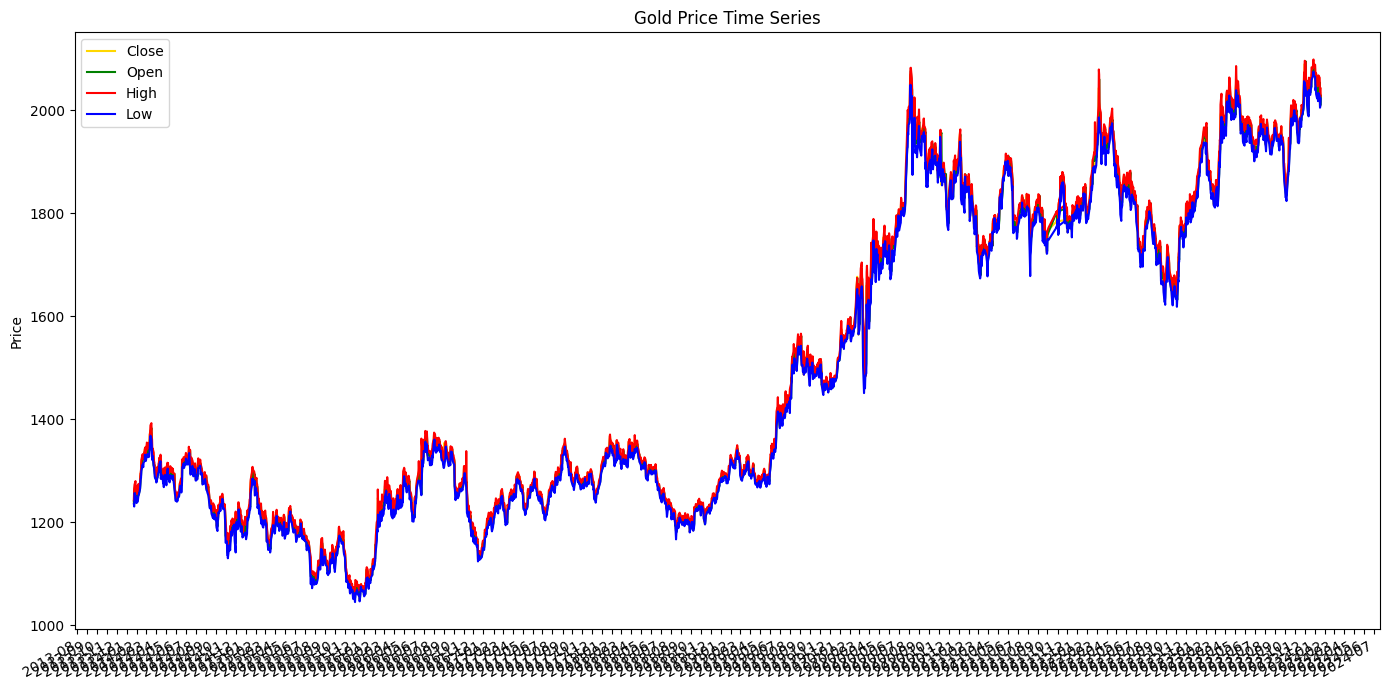

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert Date column to datetime type
data['Date'] = pd.to_datetime(data['Date'])

# Time Series Plot for Close, Open, High, and Low prices
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Close', color='gold')
plt.plot(data['Date'], data['Open'], label='Open', color='green')
plt.plot(data['Date'], data['High'], label='High', color='red')
plt.plot(data['Date'], data['Low'], label='Low', color='blue')

# Formatting the plot
plt.title('Gold Price Time Series')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate() # Rotation
plt.tight_layout()

plt.show()


*Gold Trading Volume Over Time: This plot shows the trading volume of gold over the observed period. It gives an idea of the activity level in the gold market on each day.*

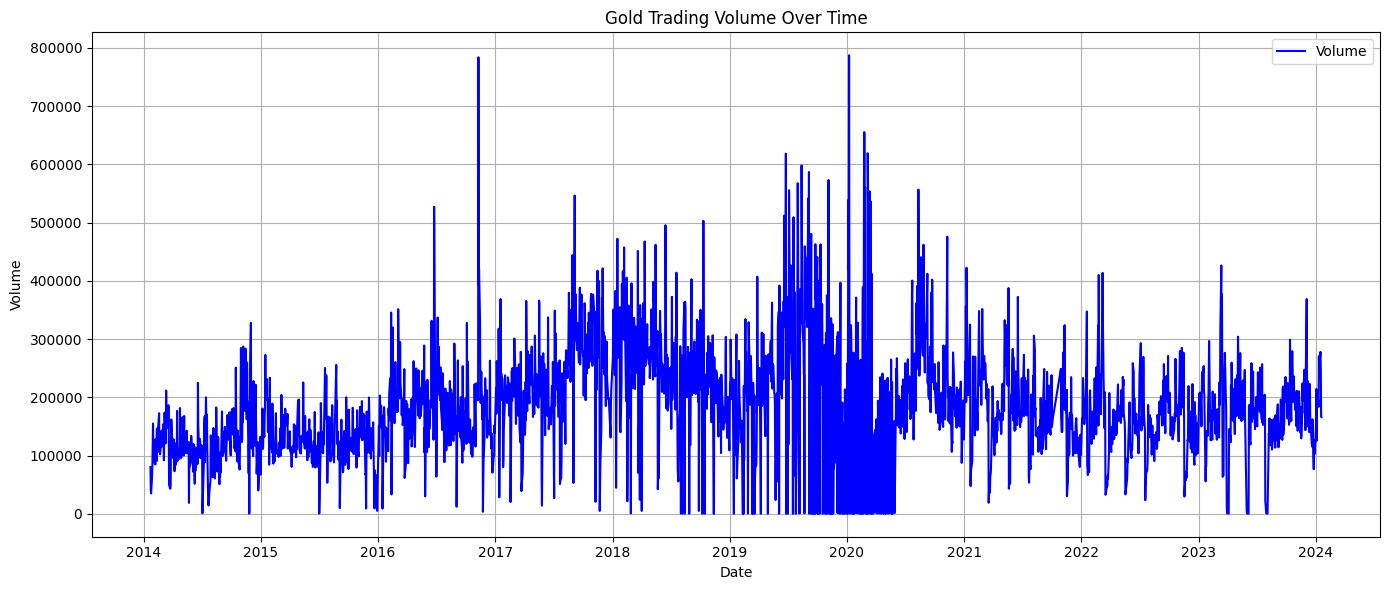

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the 'Date' column to datetime format for better plotting
data['Date'] = pd.to_datetime(data['Date'])

# Plotting the Volume over time
plt.figure(figsize=(14, 6))
plt.plot(data['Date'], data['Volume'], label='Volume', color='blue')
plt.title('Gold Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


***Box Plot of Gold Closing Prices: The box plot provides a graphical representation of the distribution of gold's closing prices. It highlights the central tendency, spread, and any potential outliers in the data.***

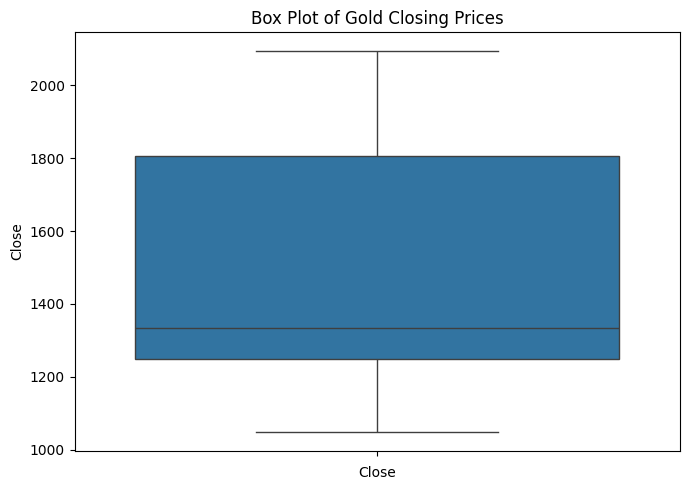

In [5]:
# Box Plot for Close Prices
plt.figure(figsize=(7, 5))
sns.boxplot(data['Close'])
plt.title('Box Plot of Gold Closing Prices')
plt.xlabel('Close')
plt.tight_layout()

plt.show()


*Correlation Heatmap of Gold Stock Features: The heatmap shows the correlation coefficients between the different features of the gold stock data (Close, Volume, Open, High, and Low). A correlation coefficient close to 1 or -1 indicates a strong positive or negative relationship, respectively, while coefficients close to 0 suggest little to no linear relationship.*

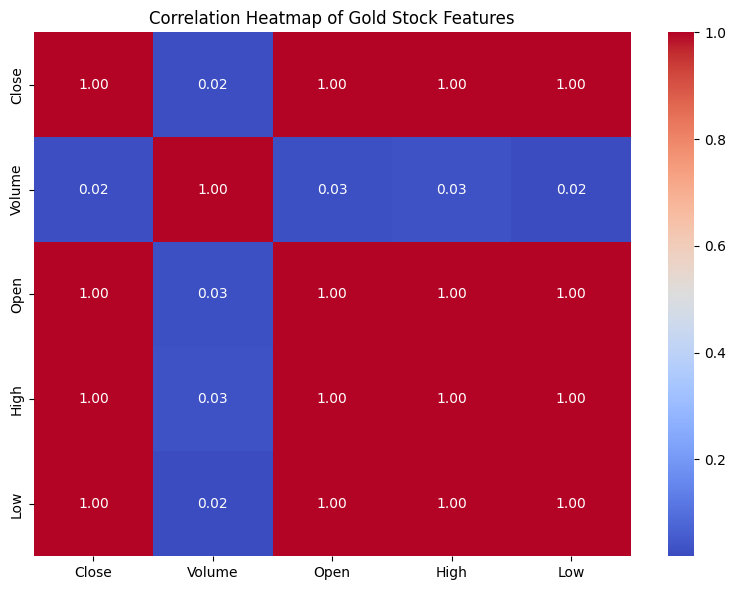

In [6]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data[['Close', 'Volume', 'Open', 'High', 'Low']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Gold Stock Features')
plt.tight_layout()

plt.show()

*Creating a candlestick chart and analyzing volatility will give us deeper insights into the gold stock market's behavior. To start, I'll plot the candlestick chart for a subset of the data to ensure clarity in visualization. Then, I'll calculate and plot the volatility of gold prices.*

  Using cached mplfinance-0.12.10b0-py3-none-any.whl (75 kB)


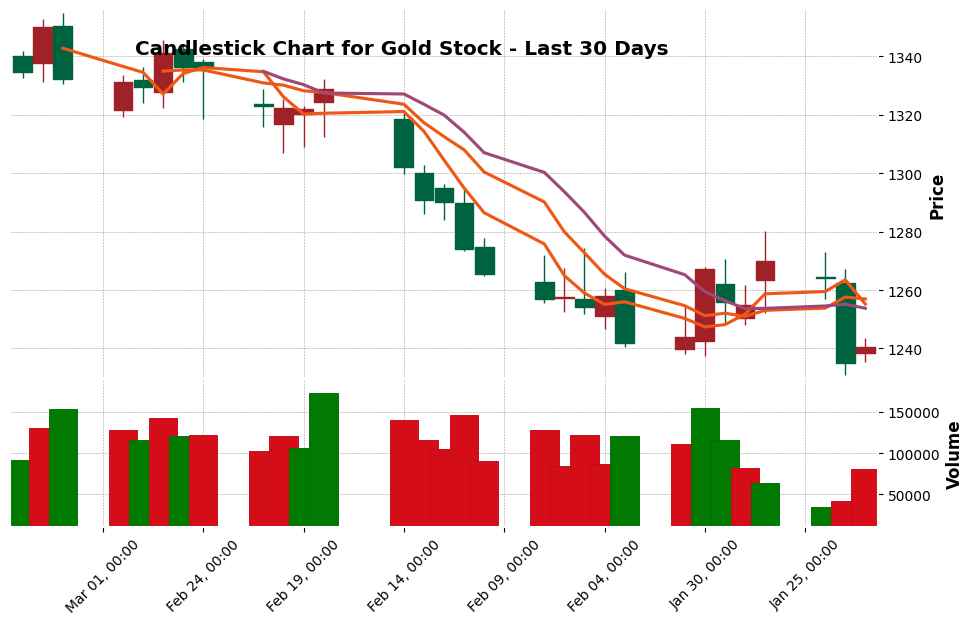

In [9]:
!pip install mplfinance

import mplfinance as mpf

# Since candlestick charts can get cluttered, we'll focus on the last 30 days of data
candlestick_data = data.set_index('Date').tail(30)

# Create a candlestick chart
mpf.plot(candlestick_data,
         type='candle',
         style='charles',
         title='Candlestick Chart for Gold Stock - Last 30 Days',
         volume=True,
         mav=(3,6,9),  # Moving averages
         figsize=(10, 6),
         tight_layout=True,
         show_nontrading=True)

Next Visual plot illustrates the volatility of gold prices over time, measured as the 7-day rolling standard deviation of daily returns. This visualization helps to understand the periods of higher uncertainty or risk in the gold market, as indicated by higher values of volatility.

Volatility can be influenced by various factors, including economic indicators, geopolitical events, and market sentiment. Periods of high volatility might suggest times of significant price movements, which could be of interest for risk management or trading strategies. *italicized text*

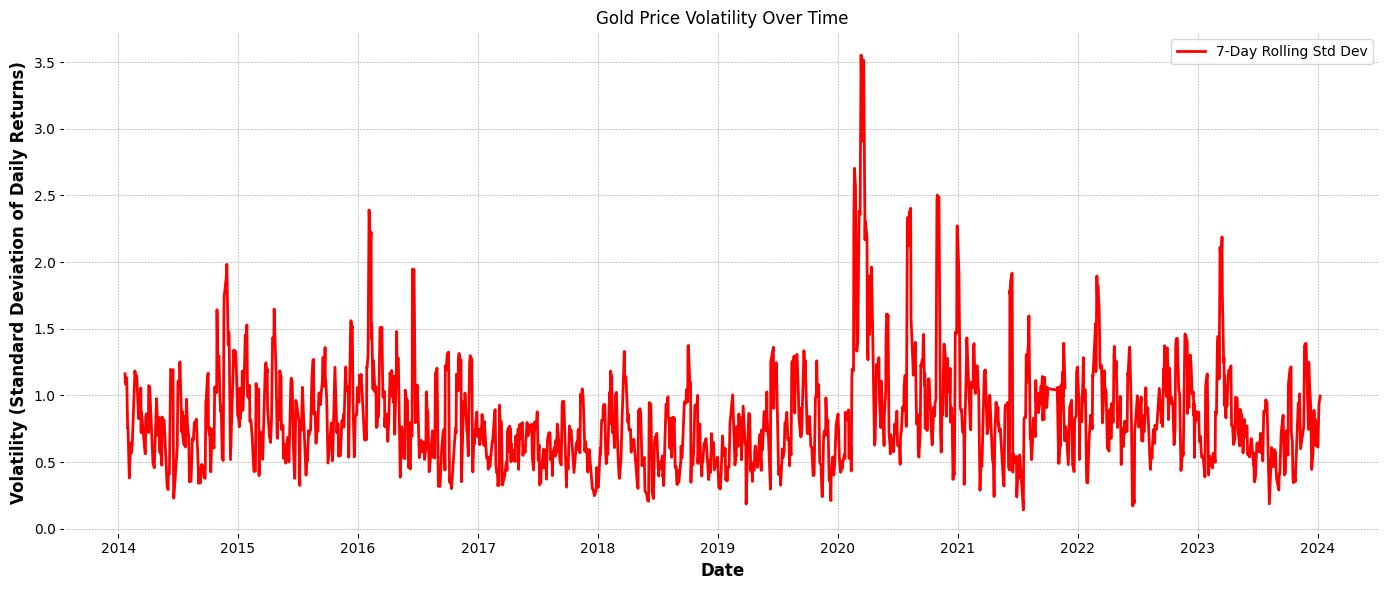

In [11]:
# Calculate daily returns as percentage change in the closing price
data['Daily_Return'] = data['Close'].pct_change() * 100

# Calculate the rolling 7-day standard deviation of daily returns to measure volatility
data['Volatility'] = data['Daily_Return'].rolling(window=7).std()

# Plotting the volatility
plt.figure(figsize=(14, 6))
plt.plot(data['Date'], data['Volatility'], label='7-Day Rolling Std Dev', color='red')
plt.title('Gold Price Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility (Standard Deviation of Daily Returns)')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()
